# Creating a high quality simulated transcriptomics data (where each feature comes from exactly the same distribution)

In [1]:
import random
import sklearn.metrics
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Take a sequence, sort it, and produce a slightly distorted version of the sorted sequence

In [2]:
def partial_random(effect_sequence, intended_r2, reverse=False):
    effect_sequence = sorted(effect_sequence)
    if reverse:
        effect_sequence = effect_sequence[::-1]
    result = effect_sequence[:]
    count = 0
    while sklearn.metrics.r2_score(effect_sequence, result) > intended_r2:
        i = random.randint(0, len(effect_sequence) - 2)
        result[i], result[i + 1] = result[i + 1], result[i]
        count += 1
    return result

In [3]:
n_people = 30
n_genes = 2*10**3
n_active_genes = 200

In [4]:
MAL = sorted([np.random.randint(0, 1200) for i in range(n_people)])

In [5]:
X = np.matrix(np.random.normal(0, 1, size=(n_people, n_genes)))

## Select indices of active genes

In [6]:
genes_i = list(range(n_genes))
random.shuffle(genes_i)
active_genes = genes_i[:n_active_genes]

In [7]:
for i in active_genes:
    effect_sequence = X[..., i].reshape(n_people).tolist()[0]
    effect_sequence = partial_random(effect_sequence, 0.6, random.randint(0, 1))
    X[..., i] = np.array(effect_sequence).reshape(n_people, 1)

## Report MAL with an ISE

In [8]:
reported_MAL = [m + np.random.randint(-400, 400) for m in MAL]

In [9]:
def original_position(sequence):
    elements = sorted(list(zip(sequence, range(len(sequence)))))
    positions = [i[1] for i in elements]
    sorted_sequence = [i[0] for i in elements]
    return sorted_sequence, positions

In [10]:
sMAL, positions = original_position(reported_MAL)

In [11]:
sMAL == [reported_MAL[i] for i in positions]

True

In [12]:
actual_MAL = [MAL[i] for i in positions]

In [13]:
sorted(list(zip(reported_MAL, MAL))) == sorted(list(zip(sMAL, actual_MAL)))

True

In [14]:
X2 = np.vstack([X[i, ...] for i in positions])

In [15]:
X2

matrix([[-1.15015087, -0.75965684,  0.13794778, ..., -0.6255097 ,
         -0.07434755, -1.55334456],
        [-1.1928095 , -1.0853519 , -0.46070597, ..., -0.96635693,
          0.2287812 , -0.61089988],
        [-0.02621516, -0.11780468,  0.75737258, ..., -1.51492611,
          1.38991152, -1.03477708],
        ...,
        [-1.5870917 ,  0.98372078, -1.98599589, ...,  0.43793277,
          0.40086043,  0.22933901],
        [ 1.23638284,  1.38143956,  0.85478882, ...,  0.75797459,
         -1.11147832,  0.79768325],
        [-0.34803761, -0.98688069,  0.18775051, ...,  2.45565671,
          0.36183709,  0.03927393]])

In [16]:
X2.shape

(30, 2000)

In [17]:
import sys

In [18]:
with open("generated_data", "w") as f:
    print("IDs", end="\t", file=f)
    for i in range(n_people):
        print("pid{}".format(i), end="\t", file=f)
    print("", file=f)
    print("ModalAllele", end="\t", file=f)
    for m in sMAL:
        print(m, end="\t", file=f)
    print(file=f)
    print("ActualMAL", end="\t", file=f)
    for a in actual_MAL:
        print(a, end="\t", file=f)
    print(file=f)
    print("Affymetrix", end="\t", file = f)
    for a in active_genes:
        print("id{}".format(a), end="\t", file=f)
    print(file=f)
    for i in range(n_genes):
        print("id{}".format(i), end = "\t", file=f)
        for elem in X2[..., i].flatten().tolist()[0]:
            print(elem, end = "\t", file=f)
        print(file=f)

# Debugging

In [19]:
results = []
for i in range(n_genes):
    r, p = scipy.stats.pearsonr(sMAL, X2[..., i].reshape(n_people).tolist()[0])
    results.append((p, r))

In [20]:
just_active = []
for i in active_genes:
    r, p = scipy.stats.pearsonr(sMAL, X2[..., i].reshape(n_people).tolist()[0])
    just_active.append((p, r))

In [21]:
just_active.sort()

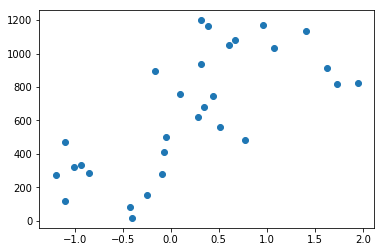

In [22]:
plt.scatter(X[..., active_genes[1]].reshape(-1).tolist()[0], actual_MAL)

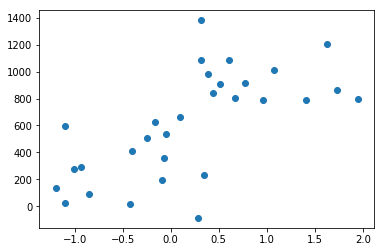

In [23]:
plt.scatter(X[..., active_genes[1]].reshape(-1).tolist()[0], reported_MAL)

In [24]:
just_active

[(1.086725480728821e-08, -0.8334118558972995),
 (1.6602969904150338e-08, -0.8278434474802168),
 (2.022167877113086e-08, -0.8251837618908741),
 (4.2798920753302365e-08, -0.8146502583736298),
 (6.015951132029966e-08, 0.8096371748640055),
 (8.425979043831629e-08, -0.804528571387706),
 (8.643686684422215e-08, -0.8041356067227098),
 (8.854531928589225e-08, -0.8037635447363279),
 (8.860969032486703e-08, -0.8037523133488502),
 (8.95229621529084e-08, 0.8035937636217075),
 (1.1146134589330084e-07, 0.800170358661601),
 (1.1149431702450853e-07, -0.8001656944601258),
 (1.1739022041156578e-07, 0.7993512102510283),
 (1.4297418549464326e-07, 0.796200505022137),
 (1.568063646863547e-07, -0.7947057733395066),
 (2.0962974253292269e-07, -0.7899259435528129),
 (2.33404053154467e-07, 0.7881257724087116),
 (2.7821404890296997e-07, 0.7851454474651205),
 (3.254054457479665e-07, -0.782446622053187),
 (3.825093827733902e-07, -0.7796214966320887),
 (4.0994540109344736e-07, 0.7783984294471624),
 (5.04064237785168

In [25]:
results.sort()

In [26]:
results[:100]

[(1.086725480728821e-08, -0.8334118558972995),
 (1.6602969904150338e-08, -0.8278434474802168),
 (2.022167877113086e-08, -0.8251837618908741),
 (4.2798920753302365e-08, -0.8146502583736298),
 (6.015951132029966e-08, 0.8096371748640055),
 (8.425979043831629e-08, -0.804528571387706),
 (8.643686684422215e-08, -0.8041356067227098),
 (8.854531928589225e-08, -0.8037635447363279),
 (8.860969032486703e-08, -0.8037523133488502),
 (8.95229621529084e-08, 0.8035937636217075),
 (1.1146134589330084e-07, 0.800170358661601),
 (1.1149431702450853e-07, -0.8001656944601258),
 (1.1739022041156578e-07, 0.7993512102510283),
 (1.4297418549464326e-07, 0.796200505022137),
 (1.568063646863547e-07, -0.7947057733395066),
 (2.0962974253292269e-07, -0.7899259435528129),
 (2.33404053154467e-07, 0.7881257724087116),
 (2.7821404890296997e-07, 0.7851454474651205),
 (3.254054457479665e-07, -0.782446622053187),
 (3.825093827733902e-07, -0.7796214966320887),
 (4.0994540109344736e-07, 0.7783984294471624),
 (5.04064237785168